In [1]:
%matplotlib notebook
from libsignetsim import Model, TimeseriesSimulation, Experiment, ModelVsTimeseriesOptimization
from libsignetsim.figure.SigNetSimFigure import SigNetSimFigure

## Settings up a model with a Michaelis-Menten reaction

In [2]:
m = Model()
m.setName("Enzymatic Reaction")

e = m.listOfSpecies.new("E")
s = m.listOfSpecies.new("S")
p = m.listOfSpecies.new("P")

m.listOfParameters.new("vmax", 1)
m.listOfParameters.new("km", 1)

r = m.listOfReactions.new("Enzymatic reaction")
r.listOfReactants.add(s)
r.listOfModifiers.add(e)
r.listOfProducts.add(p)
r.kineticLaw.setPrettyPrintMathFormula("vmax*E*S/(km+S)")

e.setValue(10)
s.setValue(12)
p.setValue(0)

## Simulating it

In [3]:
sim = TimeseriesSimulation([m], time_min=0, time_ech=0.1, time_max=20)
sim.run()

## Setting up experimental data

In [4]:
reference_times = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
reference_data = [0.0, 2, 3.5, 5.5, 7, 9, 10, 11.5, 12, 12, 12, 12, 12, 12, 12, 12, 12]

# Building the experiment
experiment = Experiment()
condition = experiment.createCondition()
for i, data in enumerate(reference_data):
    condition.addObservation(reference_times[i], 'P', data)

## Comparing simulation vs experimental data

<IPython.core.display.Javascript object>


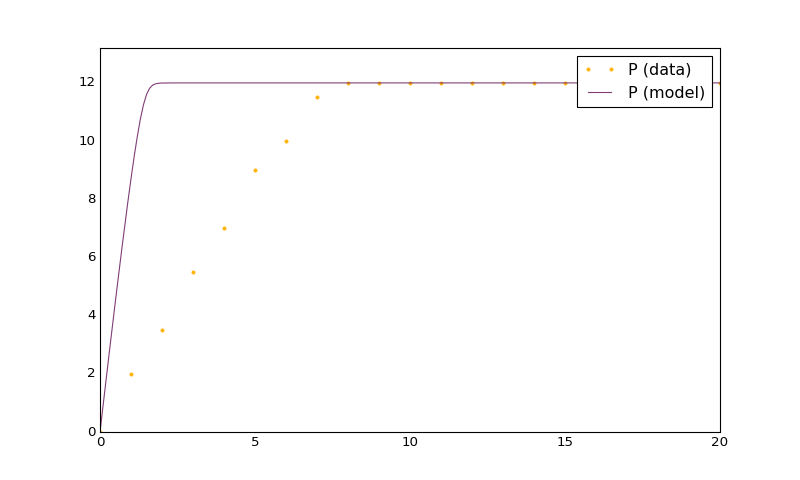

In [5]:
figure = SigNetSimFigure()
plots = experiment.plot(figure=figure, suffix=" (data)", marker='.')
sim.plot(figure=figure, plot=plots[0], variables=['P'], suffix=" (model)")


# Fitting the model

In [6]:
selected_parameters = []
for parameter in m.listOfParameters:
    selected_parameters.append((parameter, 1, 1e-6, 1e+6, 4))

fit = ModelVsTimeseriesOptimization(
    workingModel=m,
    list_of_experiments=[experiment],
    parameters_to_fit=selected_parameters,
    nb_procs=2
)

score = fit.runOptimization(2)
parameters = fit.readOptimizationOutput()

Inside runOptimization, writing files
inside writeOptimizationFiles
Writing model
Calling build
Writing...
Writing...(2)
Writing...(3)
Writing... (4)
Done, now runOptimization
Entry of runOptimization
Calling compile
Compiling
Compile returned
Calling run
Executing
call returned
self.run returned


In [7]:
for parameter, value in parameters.items():
    parameter.setValue(value)

In [8]:
sim2 = TimeseriesSimulation([m], time_min=0, time_ech=0.1, time_max=20)
sim2.run()

## Comparing data with the fitted model

<IPython.core.display.Javascript object>


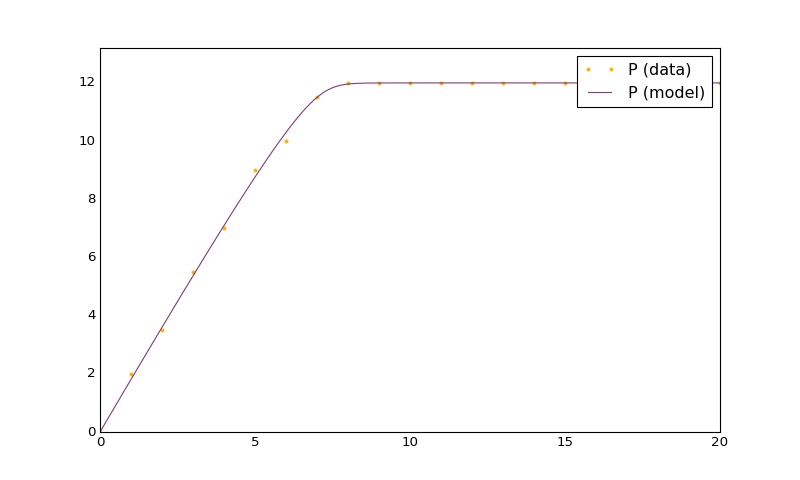

In [9]:
figure = SigNetSimFigure()
plots = experiment.plot(figure=figure, suffix=" (data)", marker='.')
sim2.plot(figure=figure, plot=plots[0], variables=['P'], suffix=" (model)")
